# Problem statement
In Tanzania, access to clean and potable water is essential for the health and well-being of its citizens. However, many water pumps 
across the country are faulty, leading to water shortages and posing significant health risks to communities. To address this issue 
and promote access to clean water, we aim to develop a predictive model that can identify faulty water pumps based on various 
features such as pump age, location, type, and condition. By accurately predicting which water pumps are faulty, authorities and
organizations can prioritize maintenance and repair efforts, ensuring that clean and safe water is readily available to all 
Tanzanians.
 Stakeholder:
The Ministry of Water in Tanzania is a key stakeholder in addressing the issue of faulty water pumps and promoting access to clean
 and potable water across the country. As the government body responsible for water resource management and infrastructure
 development, the Ministry plays a crucial role in ensuring that water supply systems are well-maintained and functional.
 By leveraging predictive modeling to identify faulty water pumps, the Ministry can efficiently allocate resources for maintenance
 and repair activities, thereby improving the reliability and accessibility of clean water for Tanzanian communit.se

## Objectives
1. To predict the functionality of water pumps: Develop a predictive model to classify water pumps into functional, non-functional, and functional needs repair categories based on various features such as amount_tsh, gps_height, waterpoint_type, and others.
2. To identify factors influencing water pump functionality: Conduct exploratory data analysis to identify the key factors (e.g., funder, installer, water quality) that influence the functionality of water pumps and their maintenance needs.
3. To optimize water pump maintenance strategies: Use historical data on water pump failures and repairs to optimize maintenance schedules and resource allocation, ensuring timely repairs and minimizing downtime of water pumps.
4. To assess the geographical distribution of water pump functionality: Analyze the geographical distribution of functional and non-functional water pumps to identify regions with high repair needs and prioritize interventions for improved access to clean water.
5. To evaluate the impact of funding sources on water pump functionality: Investigate the relationship between funding sources and water pump functionality to assess the effectiveness of different funding mechanisms in ensuring sustainable access to clean water.ter.s.




# Data understanding

In [1]:
# importing relevant modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
# displaying first few rows of the labels set
df1 = pd.read_csv('training_set_labels.csv')
df1.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [3]:
# displaying first few rows of the training set
df2 = pd.read_csv('training_set_values.csv')
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Merge df1(training_set_labels) and df2(training_set_values) to form one dataframe.
merged_df = pd.merge(df1, df2, on='id')
merged_df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
# checking the shape of the data
merged_df.shape

(59400, 41)

The data has 59400 rows and 41 columns

In [6]:
#Understanding the general information of the data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [7]:
#Understanding the descriptive statistics of the data
merged_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


# Data preparation and cleaning

In [8]:
#Checking for null values in the training set
merged_df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [9]:
# Replacing missing values in specified columns with the mode in the training set
columns_to_fill = ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']
for column in columns_to_fill:
    mode_value = merged_df[column].mode()[0]  # Calculating mode for the column
    merged_df[column].fillna(mode_value, inplace=True)  # Replacing NaN with the mode


In [10]:
# rechecking for missing values in the training set
merged_df.isnull().sum()

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 2
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s

Missing values have been replaced with the mode. Mode is used to ensure preservation of the distribution of the data.

In [11]:
#checking unique categories in status_group 
unique_values = merged_df['status_group'].unique()
unique_values

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [12]:
merged_df['status_group'] = merged_df['status_group'].replace('functional needs repair', 'functional')

# Check the unique values again
print(merged_df['status_group'].value_counts())

status_group
functional        36576
non functional    22824
Name: count, dtype: int64


In [13]:
#Checking for duplicates in the training set
merged_df.duplicated().sum()

0

There are no duplicated records

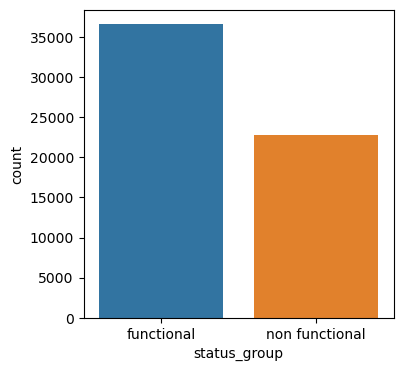

In [14]:
#checking for outliers in status_group
plt.figure(figsize=(4, 4))

sns.countplot(x='status_group', data=merged_df)

# Display the plot
plt.show()

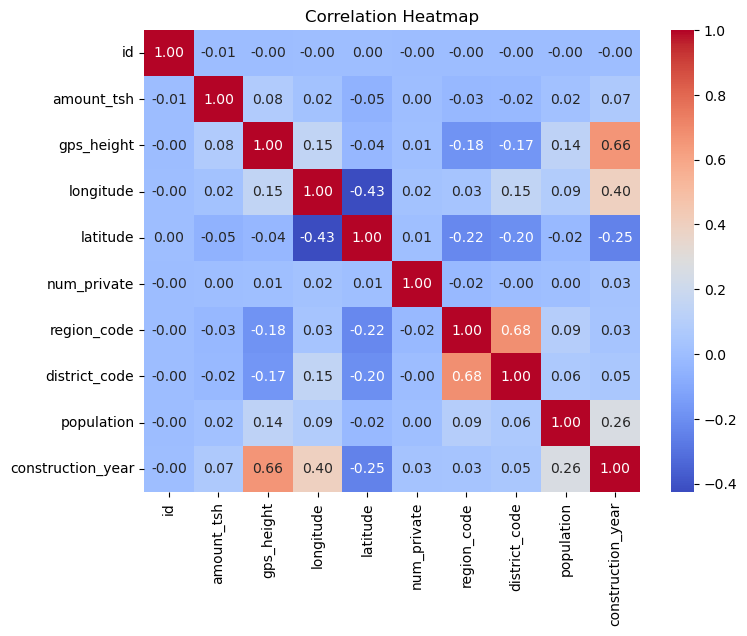

In [15]:
# Producing a correlation heat map between variables
numerical_features = merged_df.select_dtypes(include=['int64', 'float64'])
target_variable = merged_df['status_group']  # status_group being the target variable

# Computing correlation matrix
correlation_matrix = numerical_features.corr()

# Ploting heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [16]:
#Identifying the top correlations to use in modelling
correlation_coefficients = numerical_features.corr()
top_correlations = correlation_coefficients.unstack().sort_values(ascending=False)

# Print the top correlations
print("Top Correlations:")
print(top_correlations.head(20))

Top Correlations:
id                 id                   1.000000
amount_tsh         amount_tsh           1.000000
population         population           1.000000
district_code      district_code        1.000000
region_code        region_code          1.000000
num_private        num_private          1.000000
latitude           latitude             1.000000
longitude          longitude            1.000000
gps_height         gps_height           1.000000
construction_year  construction_year    1.000000
district_code      region_code          0.678602
region_code        district_code        0.678602
gps_height         construction_year    0.658727
construction_year  gps_height           0.658727
                   longitude            0.396732
longitude          construction_year    0.396732
population         construction_year    0.260910
construction_year  population           0.260910
district_code      longitude            0.151398
longitude          district_code        0.151398
dt

C:\Users\nyamb\AppData\Local\Temp\ipykernel_17768\277846244.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[feature].dropna(), kde=False)


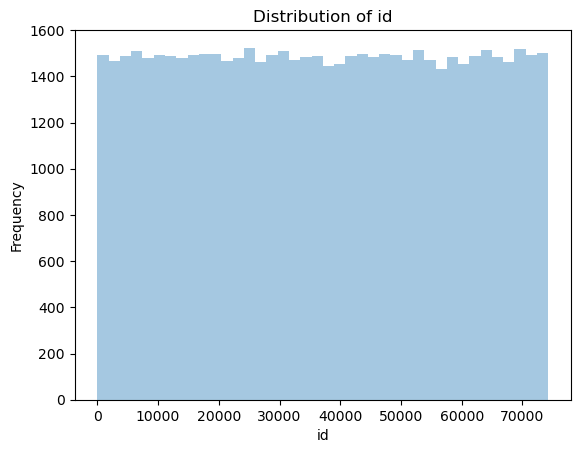

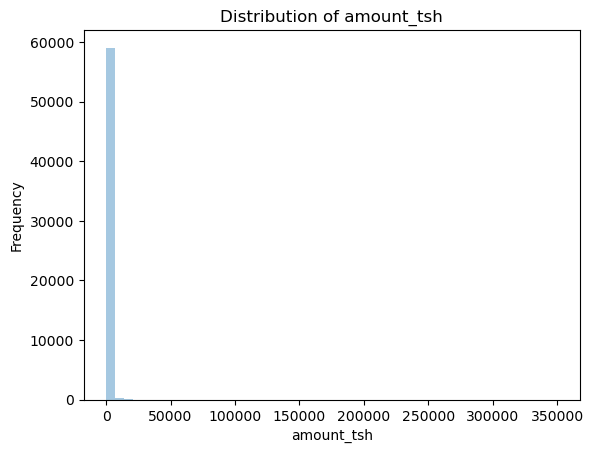

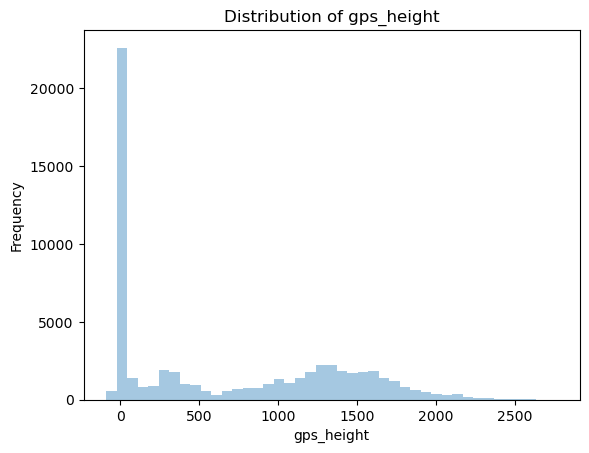

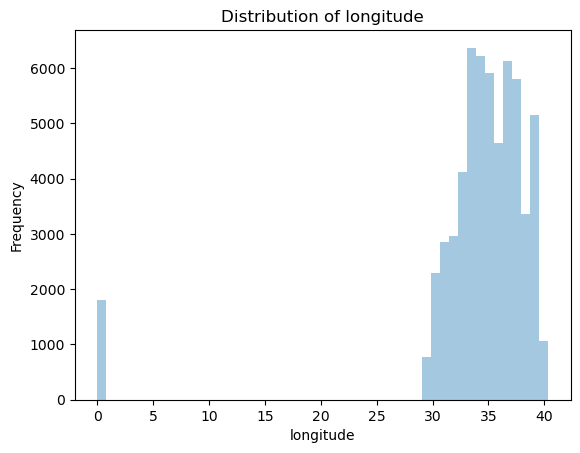

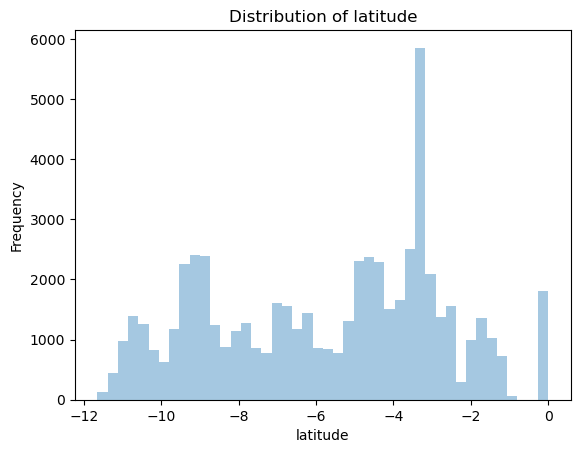

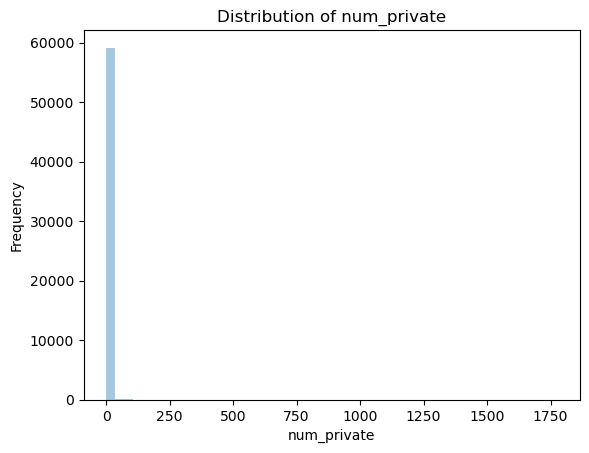

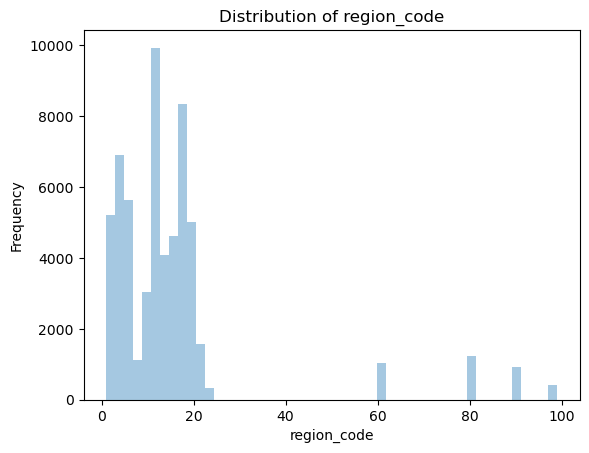

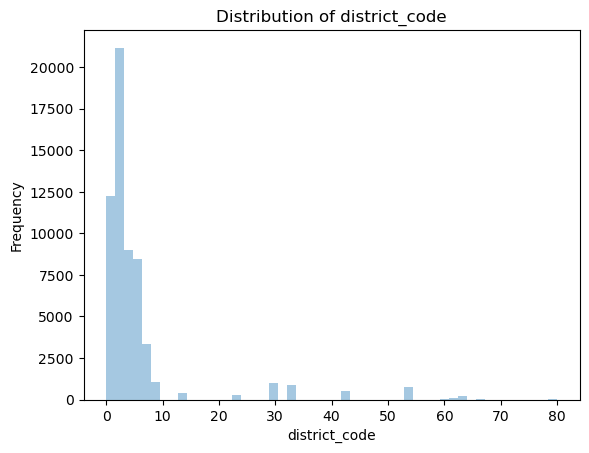

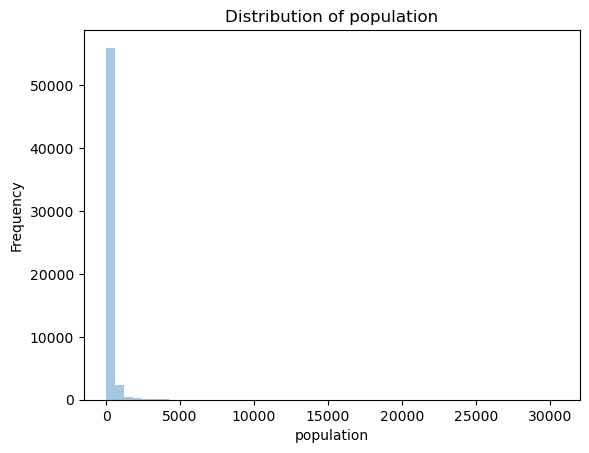

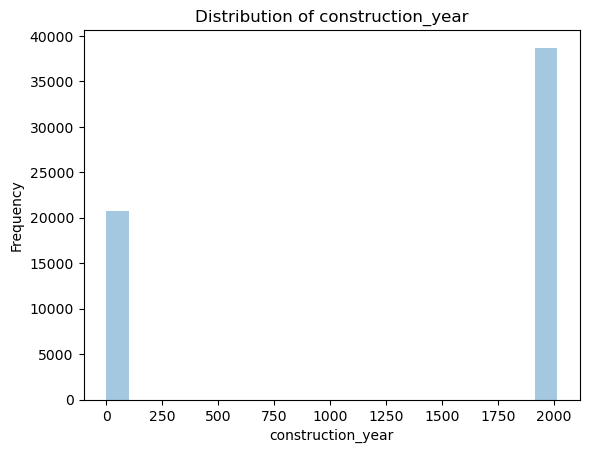

In [17]:
# Distribution before transformation
numerical_features = merged_df.select_dtypes(include=['int64', 'float64'])

# Plot the distribution of numerical features
for feature in numerical_features.columns:
    sns.distplot(merged_df[feature].dropna(), kde=False)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

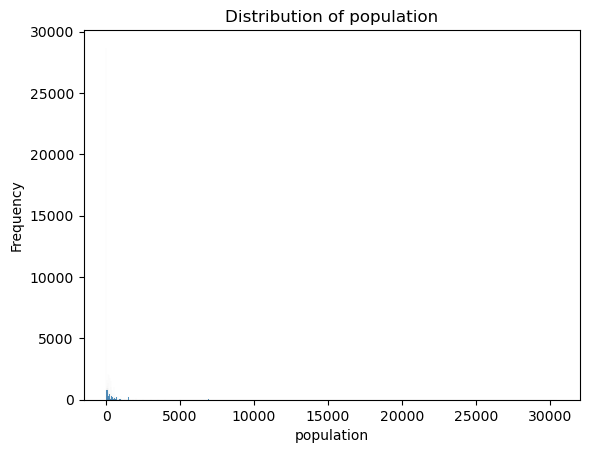

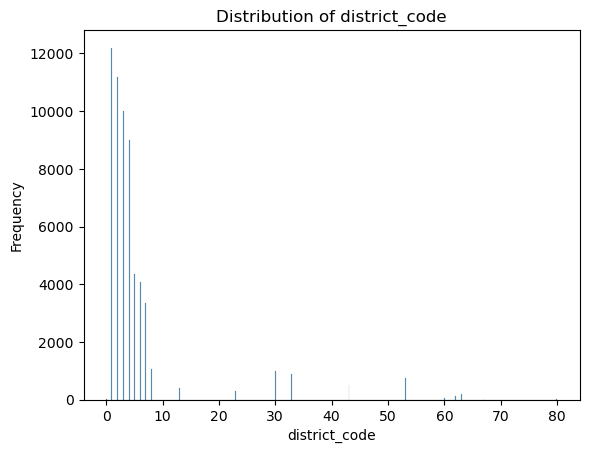

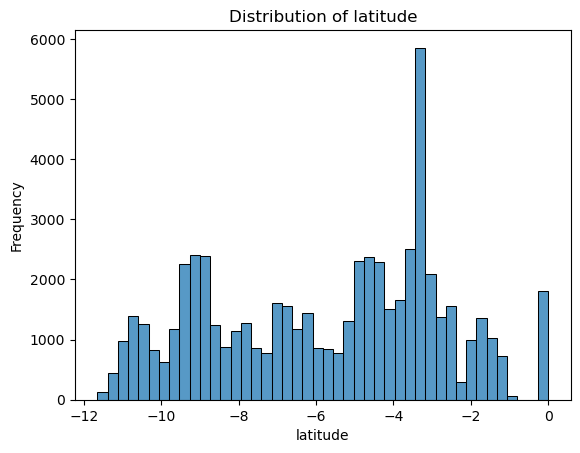

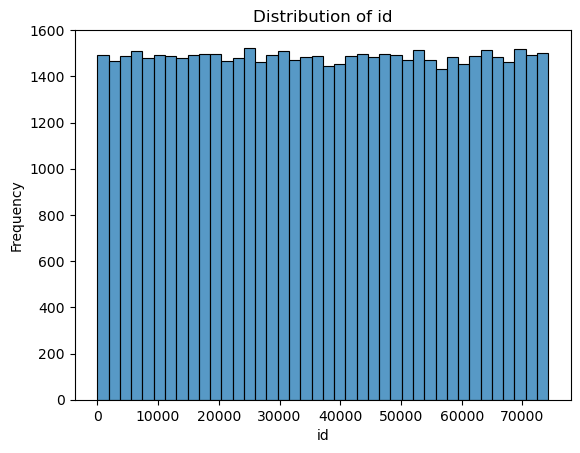

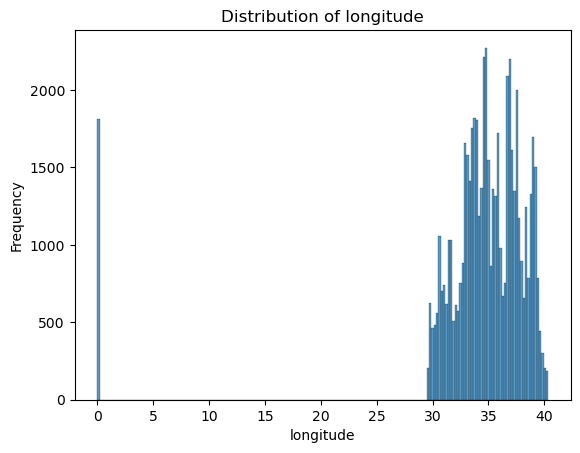

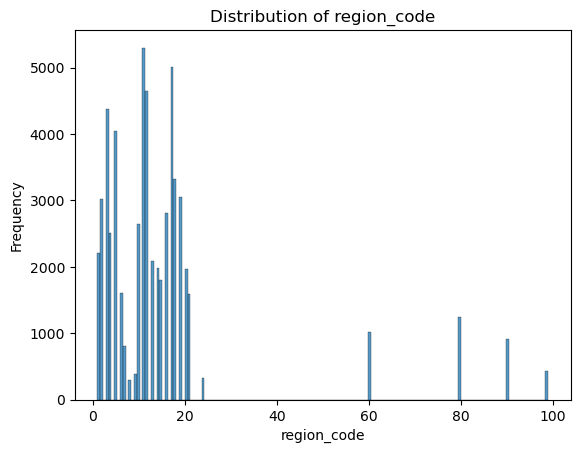

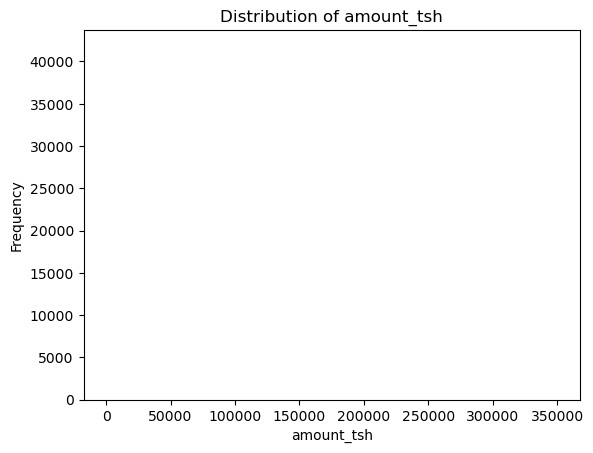

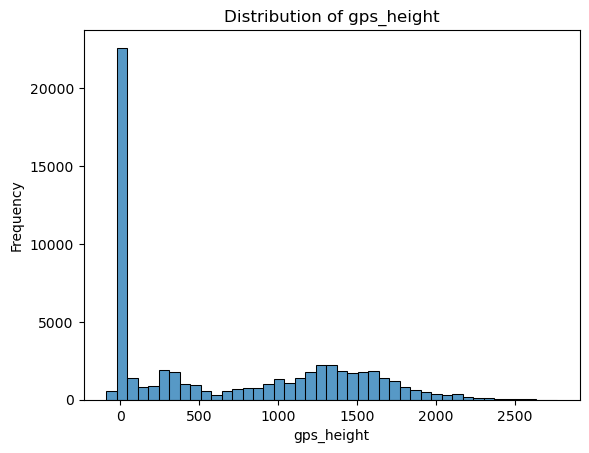

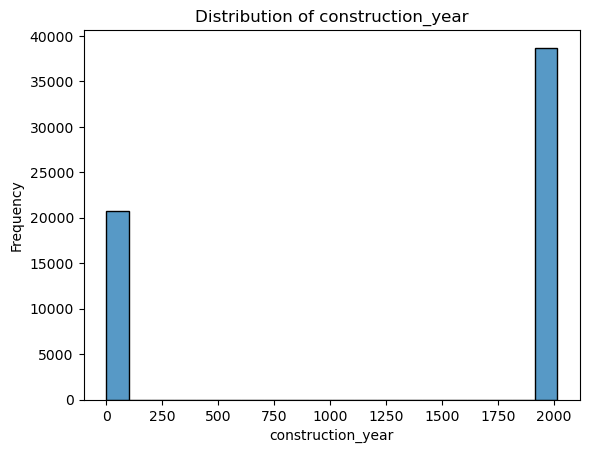

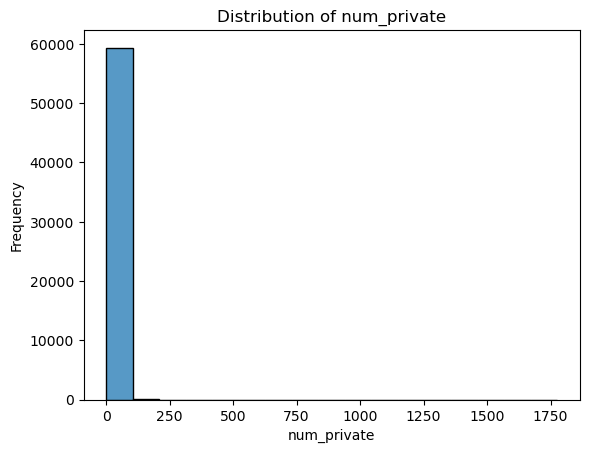

In [18]:
numerical_features = merged_df.select_dtypes(include=['int64', 'float64'])
num_features_to_plot = min(10, len(numerical_features.columns))  # Limit to 10 features
selected_features = random.sample(list(numerical_features.columns), num_features_to_plot)

# Plot the distribution of selected numerical features
for feature in selected_features:
    sns.histplot(merged_df[feature].dropna(), kde=False)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
numerical_features = merged_df.select_dtypes(include=['int64', 'float64'])

# Set up the subplot grid
num_plots = len(numerical_features.columns)
num_cols = 4
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Plot the distribution of numerical features
for i, feature in enumerate(numerical_features.columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(merged_df[feature].dropna(), kde=False, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Frequency")

# Hide empty subplots if any
for i in range(num_plots, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.read_csv('test_set_values.csv')
df2

In [ ]:
# checking for duplicates in the test set
df2.duplicated().sum()

There are no duplicates in the test set

In [ ]:
# checking for missing values in the test set
df2.isnull().sum()